In [1]:
#Import required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *


In [2]:
#Load dataset

df = pd.read_csv("new_insurance_data.csv")

In [3]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [4]:
#Shape of the dataset

df.shape

(1338, 13)

In [5]:
#Basic Info 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [6]:
#Checking null values

df.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [7]:
#Handling Null Values: Removing

df = df.dropna()

In [8]:
#Checking Duplicates

df.duplicated().sum()

0

In [9]:
#Get Column Names

col = df.columns
col

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

<h3>Visualization</h3>

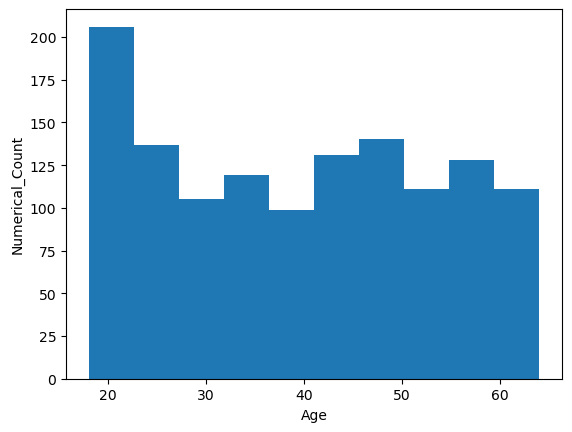

In [10]:
#Histogram

plt.hist(df['age'])
plt.xlabel('Age')
plt.ylabel('Numerical_Count')
plt.show()

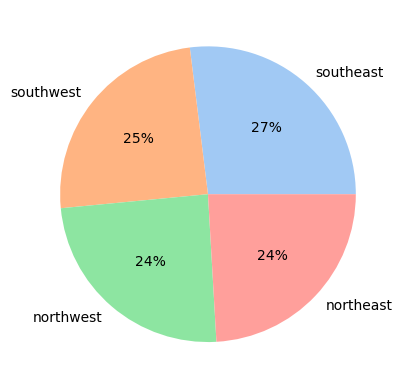

In [11]:
#Pie chart for region

colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(df['region'].value_counts(), labels = df['region'].unique(), colors = colors, autopct='%.0f%%')
plt.show()

<Axes: xlabel='smoker', ylabel='past_consultations'>

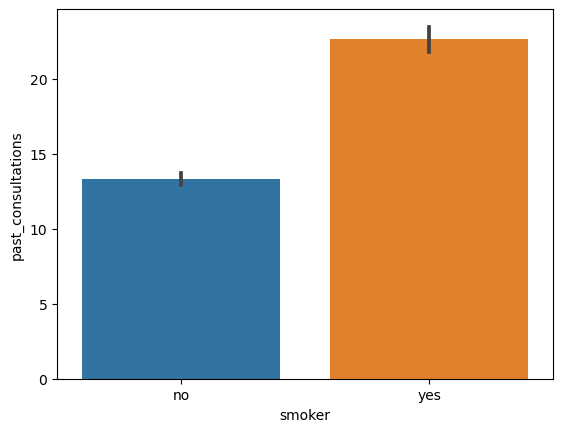

In [12]:
#Smoker Numbers

sns.barplot(df, x="smoker", y="past_consultations")

<Axes: xlabel='smoker', ylabel='count'>

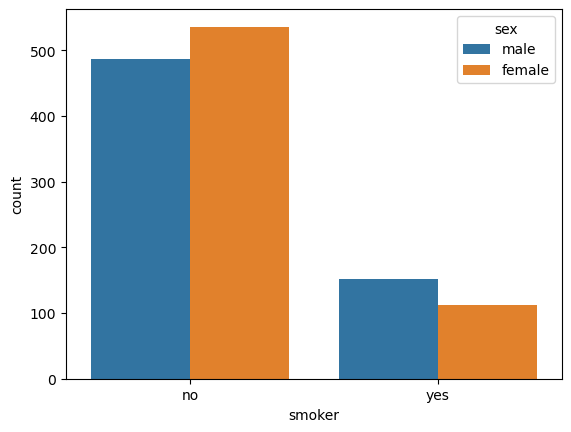

In [13]:
sns.countplot(df, x="smoker", hue="sex")

In [14]:
#Statistical component analysis

df.describe()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
count,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1.287000e+03,1.287000e+03,1287.000000,1.287000e+03,1287.000000
mean,39.419580,30.655746,1.094794,33498.578933,15.247086,9.113778e+05,1.579929e+07,1.068376,3.727972e+08,13366.072420
std,14.051987,6.086323,1.202782,15611.720348,7.457366,9.083364e+04,2.653821e+07,0.529079,5.655770e+08,12025.821700
min,18.000000,15.960000,0.000000,2912.590584,1.000000,6.991570e+05,2.945253e+04,0.000000,3.150786e+06,1121.873900
25%,27.000000,26.220000,0.000000,20905.974820,9.000000,8.489270e+05,4.114357e+06,1.000000,7.964523e+07,4842.251225
50%,40.000000,30.360000,1.000000,33968.774160,15.000000,9.152840e+05,7.567064e+06,1.000000,1.451129e+08,9549.565100
75%,51.000000,34.600000,2.000000,45152.414195,20.000000,9.726140e+05,1.093014e+07,1.000000,3.337660e+08,16964.132700
max,64.000000,53.130000,5.000000,77277.988480,40.000000,1.107872e+06,2.616317e+08,3.000000,4.117197e+09,63770.428010


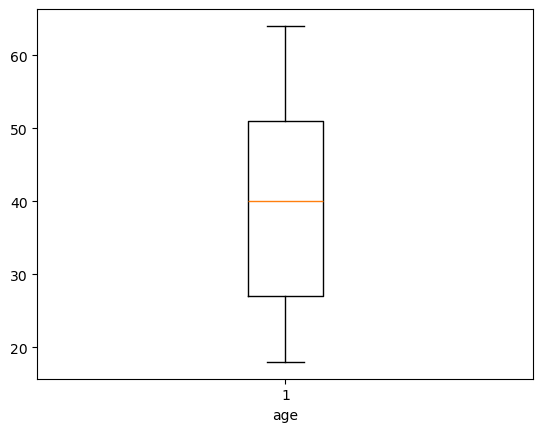

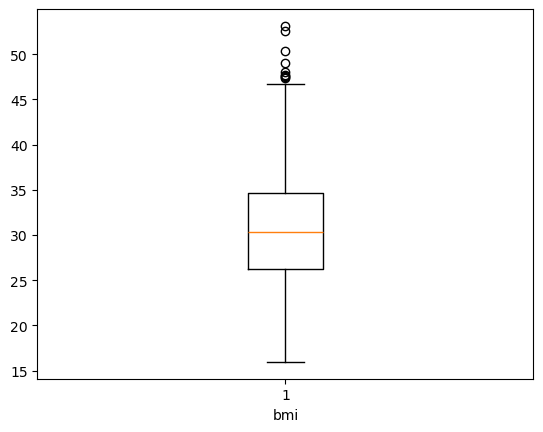

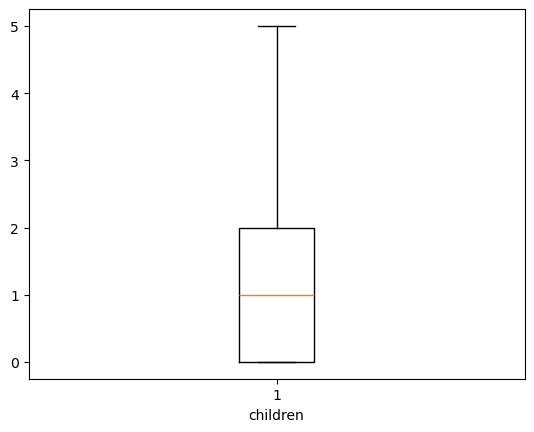

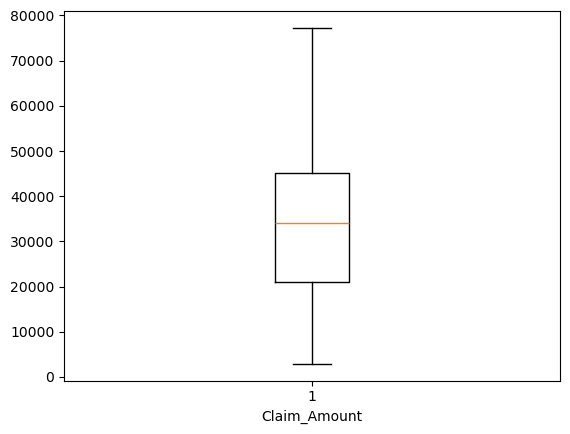

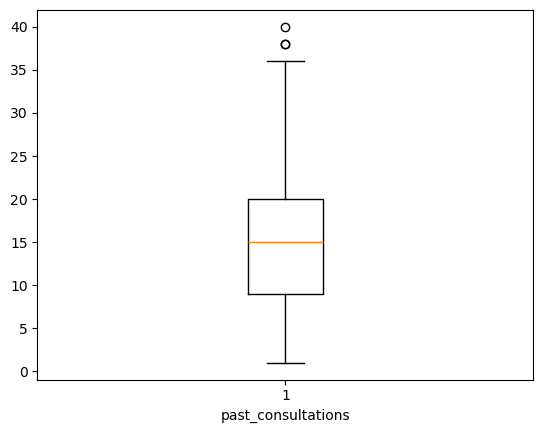

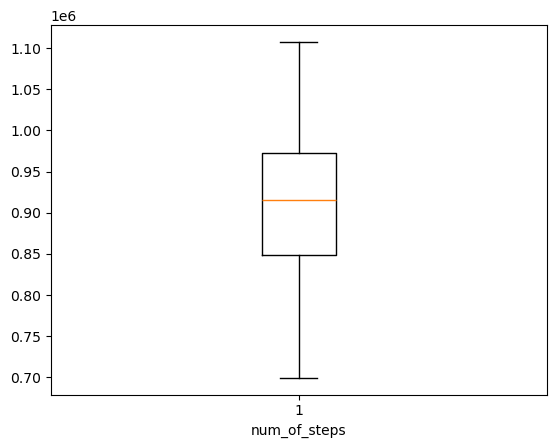

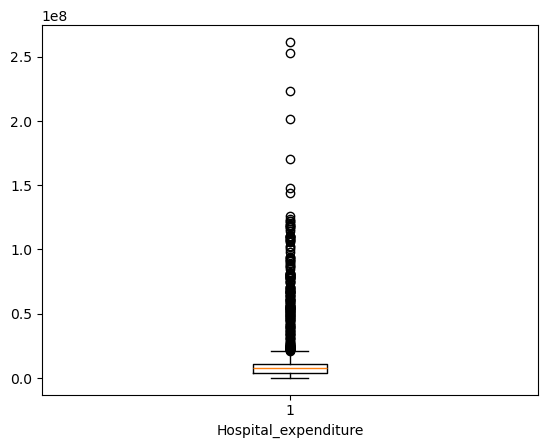

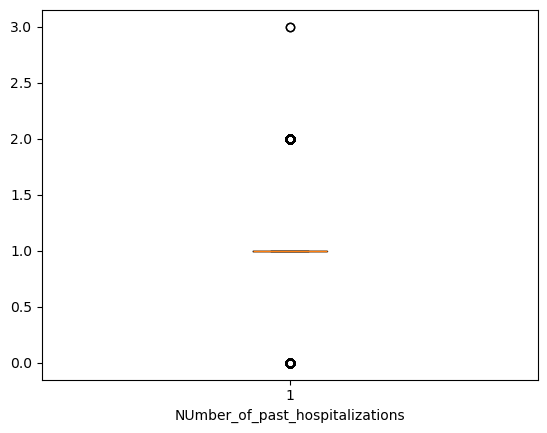

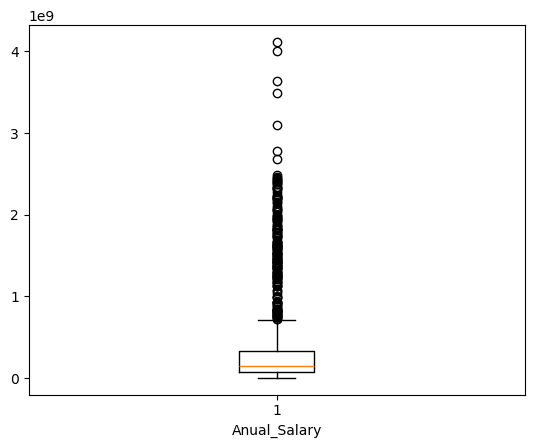

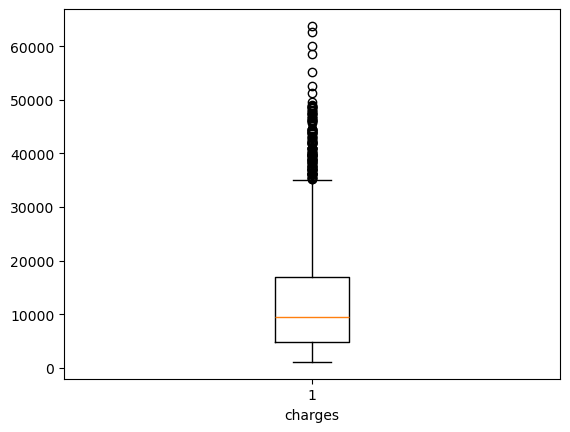

In [15]:
#Detecting Outliers

for itr in col:
    if(df[itr].dtypes == 'int64' or df[itr].dtypes == 'float64'):
        plt.boxplot(df[itr])
        plt.xlabel(itr)
        plt.show()

In [16]:
spl1 = df
spl2 = df
spl3 = df

In [17]:
# Correlation

corr = df.corr(numeric_only=True)
corr

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
age,1.000000,0.108536,0.043423,0.110112,0.162433,0.510655,0.124020,0.352799,0.158956,0.283152
bmi,0.108536,1.000000,0.009907,0.096924,0.123539,0.131594,0.252588,0.137030,0.235914,0.194420
children,0.043423,0.009907,1.000000,0.039960,0.053911,0.155004,0.022253,0.177986,0.032490,0.065703
Claim_Amount,0.110112,0.096924,0.039960,1.000000,0.269426,0.399889,0.372890,0.380476,0.411221,0.437752
past_consultations,0.162433,0.123539,0.053911,0.269426,1.000000,0.562708,0.537832,0.504391,0.596954,0.629160
num_of_steps,0.510655,0.131594,0.155004,0.399889,0.562708,1.000000,0.623659,0.845985,0.739091,0.891532
Hospital_expenditure,0.124020,0.252588,0.022253,0.372890,0.537832,0.623659,1.000000,0.657684,0.969218,0.871482
NUmber_of_past_hospitalizations,0.352799,0.137030,0.177986,0.380476,0.504391,0.845985,0.657684,1.000000,0.745324,0.824245
Anual_Salary,0.158956,0.235914,0.032490,0.411221,0.596954,0.739091,0.969218,0.745324,1.000000,0.953653
charges,0.283152,0.194420,0.065703,0.437752,0.629160,0.891532,0.871482,0.824245,0.953653,1.000000


In [18]:
#Encoding categorical data
df['smoker'].unique()

array(['no', 'yes'], dtype=object)

In [19]:
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df['smoker'])


df.drop("smoker", axis=1, inplace=True)
 
# Appending the array to our dataFrame 
df["smoker"] = label
 
# printing Dataframe
df

C:\Users\jadha\AppData\Local\Temp\ipykernel_18072\1914210961.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("smoker", axis=1, inplace=True)
C:\Users\jadha\AppData\Local\Temp\ipykernel_18072\1914210961.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["smoker"] = label


,age,sex,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges,smoker
0,18.0,male,23.210,0.0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390,0
1,18.0,male,30.140,0.0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660,0
2,18.0,male,33.330,0.0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070,0
3,18.0,male,33.660,0.0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940,0
4,18.0,male,34.100,0.0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209,1
1334,31.0,female,38.095,1.0,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448,1
1335,52.0,male,34.485,3.0,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897,1
1336,45.0,male,30.360,0.0,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309,1


In [20]:
df['sex'].unique()

array(['male', 'female'], dtype=object)

In [21]:
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df['sex'])


df.drop("sex", axis=1, inplace=True)
 
# Appending the array to our dataFrame 
df["sex"] = label
 
# printing Dataframe
df

C:\Users\jadha\AppData\Local\Temp\ipykernel_18072\916415019.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("sex", axis=1, inplace=True)
C:\Users\jadha\AppData\Local\Temp\ipykernel_18072\916415019.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sex"] = label


,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges,smoker,sex
0,18.0,23.210,0.0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390,0,1
1,18.0,30.140,0.0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660,0,1
2,18.0,33.330,0.0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070,0,1
3,18.0,33.660,0.0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940,0,1
4,18.0,34.100,0.0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,35.530,0.0,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209,1,0
1334,31.0,38.095,1.0,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448,1,0
1335,52.0,34.485,3.0,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897,1,1
1336,45.0,30.360,0.0,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309,1,1


In [22]:
# using .get_dummies function to convert the categorical datatype to numerical and storing in a new variable df1
df1 = pd.get_dummies(df['region'])
 
# using pd.concat to concatenate the dataframes df and df1 and storing the concatenated dataFrame in df.
df = pd.concat([df, df1], axis=1).reindex(df.index)
 
# removing the column from df as it is of no use now.
df.drop('region', axis=1, inplace=True)
 
# printing df
df

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges,smoker,sex,northeast,northwest,southeast,southwest
0,18.0,23.210,0.0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,1121.87390,0,1,False,False,True,False
1,18.0,30.140,0.0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,1131.50660,0,1,False,False,True,False
2,18.0,33.330,0.0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,1135.94070,0,1,False,False,True,False
3,18.0,33.660,0.0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,1136.39940,0,1,False,False,True,False
4,18.0,34.100,0.0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,1137.01100,0,1,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,35.530,0.0,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,55135.40209,1,0,False,True,False,False
1334,31.0,38.095,1.0,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,58571.07448,1,0,True,False,False,False
1335,52.0,34.485,3.0,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,60021.39897,1,1,False,True,False,False
1336,45.0,30.360,0.0,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,62592.87309,1,1,False,False,True,False


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1287 entries, 0 to 1337
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1287 non-null   float64
 1   bmi                              1287 non-null   float64
 2   children                         1287 non-null   float64
 3   Claim_Amount                     1287 non-null   float64
 4   past_consultations               1287 non-null   float64
 5   num_of_steps                     1287 non-null   float64
 6   Hospital_expenditure             1287 non-null   float64
 7   NUmber_of_past_hospitalizations  1287 non-null   float64
 8   Anual_Salary                     1287 non-null   float64
 9   charges                          1287 non-null   float64
 10  smoker                           1287 non-null   int32  
 11  sex                              1287 non-null   int32  
 12  northeast                

In [24]:
col = df.columns
col

Index(['age', 'bmi', 'children', 'Claim_Amount', 'past_consultations',
       'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'charges', 'smoker',
       'sex', 'northeast', 'northwest', 'southeast', 'southwest'],
      dtype='object')

<h3>Model Building</h3>

In [25]:
y=df.loc[:,['charges']]

In [26]:
# to store all the feature other than target in x as independant variables

x = df.loc[:,['age', 'bmi', 'children', 'Claim_Amount', 'past_consultations',
       'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'smoker',
       'sex', 'northeast', 'northwest', 'southeast', 'southwest']]



In [27]:
#Splitting training and testing data

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=30)

In [28]:
lr = LinearRegression()
lr

LinearRegression()

In [29]:
# .fit() method is used to provide the training data as input in the machine
lr.fit(x_train,y_train)

LinearRegression()

In [30]:
#Testing the model on test data

pred = lr.predict(x_test)
pred

array([[ 3.54575927e+03],
       [ 1.09227217e+04],
       [ 9.96449918e+03],
       [ 1.64177181e+03],
       [ 3.37628623e+03],
       [ 1.18053996e+04],
       [ 1.25321934e+04],
       [ 8.06426485e+03],
       [ 4.34877526e+04],
       [ 1.39164546e+04],
       [ 3.69287174e+04],
       [ 1.19971784e+04],
       [ 2.42245928e+04],
       [ 3.73402938e+03],
       [ 1.08428822e+04],
       [ 4.19179248e+04],
       [ 3.39166396e+02],
       [ 1.21187648e+04],
       [ 2.64781271e+04],
       [ 1.72645676e+04],
       [ 2.11500923e+03],
       [ 1.46228274e+04],
       [ 4.38099114e+03],
       [ 2.23936182e+04],
       [ 1.35391555e+04],
       [ 1.49378578e+04],
       [ 2.48621420e+04],
       [ 8.31465554e+03],
       [-7.04818030e+02],
       [ 2.09400150e+04],
       [ 1.83157024e+04],
       [ 3.94457772e+02],
       [ 7.43092029e+03],
       [ 1.88353951e+03],
       [-9.73903819e+02],
       [ 7.96284849e+02],
       [ 9.88734602e+03],
       [ 5.27676845e+03],
       [ 1.7

In [31]:
# Compare with y_test for better understanding of
# accuracy of the model built for the comparison of expected outputs and predicted outputs

# In short calculate r2s

In [32]:
score = r2_score(y_test,pred)
score

0.9916495634542354

In [33]:
spl1

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges,smoker,sex
0,18.0,23.210,0.0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390,0,1
1,18.0,30.140,0.0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660,0,1
2,18.0,33.330,0.0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070,0,1
3,18.0,33.660,0.0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940,0,1
4,18.0,34.100,0.0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,35.530,0.0,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209,1,0
1334,31.0,38.095,1.0,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448,1,0
1335,52.0,34.485,3.0,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897,1,1
1336,45.0,30.360,0.0,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309,1,1


In [34]:
spl2

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges,smoker,sex
0,18.0,23.210,0.0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390,0,1
1,18.0,30.140,0.0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660,0,1
2,18.0,33.330,0.0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070,0,1
3,18.0,33.660,0.0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940,0,1
4,18.0,34.100,0.0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,35.530,0.0,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209,1,0
1334,31.0,38.095,1.0,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448,1,0
1335,52.0,34.485,3.0,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897,1,1
1336,45.0,30.360,0.0,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309,1,1


In [35]:
spl1['Hospital_expenditure'].describe()

count    1.287000e+03
mean     1.579929e+07
std      2.653821e+07
min      2.945253e+04
25%      4.114357e+06
50%      7.567064e+06
75%      1.093014e+07
max      2.616317e+08
Name: Hospital_expenditure, dtype: float64

In [36]:
# For Hospital_expenditure
Q1 = spl1.Hospital_expenditure.quantile(0.25)
Q3 = spl1.Hospital_expenditure.quantile(0.75)

IQR = Q3 - Q1

# filtering out the outliers by using the reversal condition

spl1 = spl1[(spl1.Hospital_expenditure >= Q1 - 1.5 * (IQR)) & (spl1.Hospital_expenditure <= Q3 + 1.5 * (IQR))]


In [37]:
spl1['Hospital_expenditure'].describe()

count    1.092000e+03
mean     6.775631e+06
std      4.061530e+06
min      2.945253e+04
25%      3.526764e+06
50%      6.513927e+06
75%      9.194120e+06
max      2.097569e+07
Name: Hospital_expenditure, dtype: float64

In [38]:
spl1

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges,smoker,sex
0,18.0,23.21,0.0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390,0,1
1,18.0,30.14,0.0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660,0,1
2,18.0,33.33,0.0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070,0,1
3,18.0,33.66,0.0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940,0,1
4,18.0,34.10,0.0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,54.0,25.10,3.0,45956.96538,19.0,1027713.0,1.709004e+07,2.0,6.461079e+08,southwest,25382.29700,1,1
1142,50.0,27.36,0.0,36320.75384,16.0,1001618.0,1.772151e+07,2.0,7.139574e+08,northeast,25656.57526,0,0
1144,52.0,26.40,3.0,53738.44070,12.0,1021206.0,1.760836e+07,2.0,7.481488e+08,southeast,25992.82104,0,1
1145,21.0,32.68,2.0,65600.22548,25.0,1014768.0,1.802212e+07,2.0,7.262863e+08,northwest,26018.95052,0,0


In [39]:
# For Anual_Salary column
Q1 = spl1.Anual_Salary.quantile(0.25)
Q3 = spl1.Anual_Salary.quantile(0.75)

IQR = Q3 - Q1

# filtering out the outliers by using the reversal condition

spl1 = spl1[(spl1.Anual_Salary >= Q1 - 1.5 * (IQR)) & (spl1.Anual_Salary <= Q3 + 1.5 * (IQR))]

In [40]:
spl1['Anual_Salary'].describe()

count    9.920000e+02
mean     1.280477e+08
std      8.076854e+07
min      3.150786e+06
25%      6.916496e+07
50%      1.097111e+08
75%      1.744960e+08
max      3.829703e+08
Name: Anual_Salary, dtype: float64

In [41]:
# For Anual_Salary column
Q1 = spl2.Anual_Salary.quantile(0.25)
Q3 = spl2.Anual_Salary.quantile(0.75)

IQR = Q3 - Q1

# filtering out the outliers by using the reversal condition

spl2 = spl2[(spl2.Anual_Salary >= Q1 - 1.5 * (IQR)) & (spl2.Anual_Salary <= Q3 + 1.5 * (IQR))]

In [42]:
spl2['Anual_Salary'].describe()

count    1.101000e+03
mean     1.679984e+08
std      1.460635e+08
min      3.150786e+06
25%      7.224537e+07
50%      1.203525e+08
75%      2.008540e+08
max      7.139574e+08
Name: Anual_Salary, dtype: float64

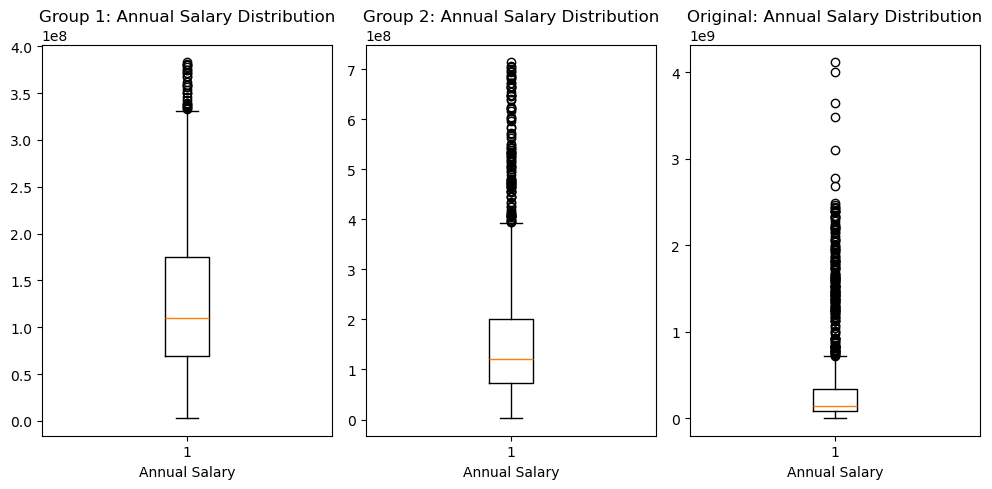

In [44]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))  # Adjust figsize as needed

# Plot boxplots for each group
ax1.boxplot(spl1['Anual_Salary'])
ax1.set_title("Group 1: Annual Salary Distribution")
ax1.set_xlabel("Annual Salary")

ax2.boxplot(spl2['Anual_Salary'])
ax2.set_title("Group 2: Annual Salary Distribution")
ax2.set_xlabel("Annual Salary")

ax3.boxplot(spl3['Anual_Salary'])
ax3.set_title("Original: Annual Salary Distribution")
ax3.set_xlabel("Annual Salary")

plt.tight_layout()
plt.show()